In [168]:
import numpy as np
import pandas as pd 
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

In [169]:
df1 = pd.read_csv("data/Play Store Data.csv")
df2 = pd.read_csv("data/User Reviews.csv")

# Overview of the Dataset

In [170]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [171]:
df1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [172]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [173]:
df2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Getting More infor about these dataset

In [174]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [175]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [176]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [177]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


Now we will find any null values in the dataset

In [178]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

as we can see rating having some null values and that can be true 

In [179]:
# checking any value rating more than 5 
df1[df1.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [180]:
df1.drop([10472],inplace = True)

<AxesSubplot:>

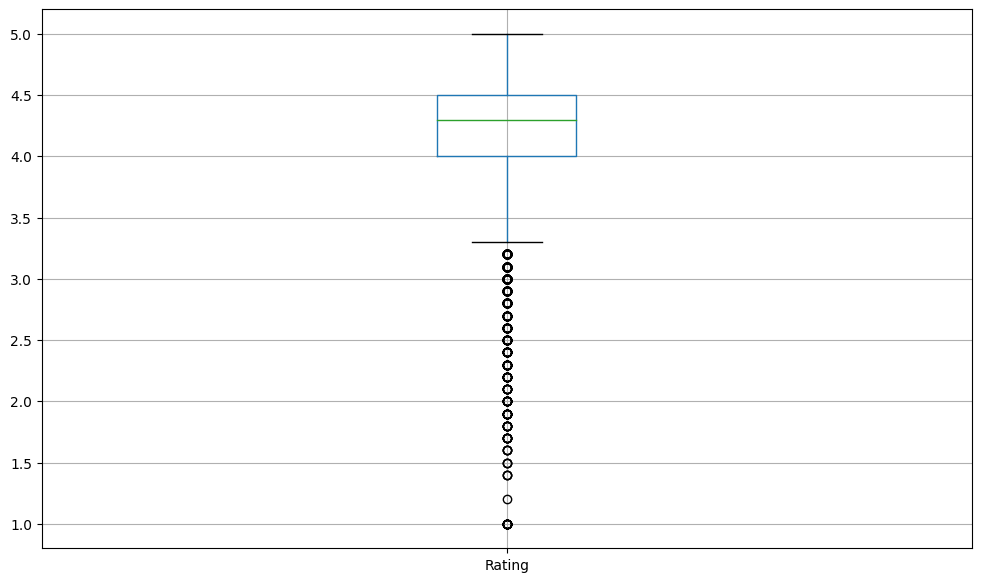

In [181]:
df1.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

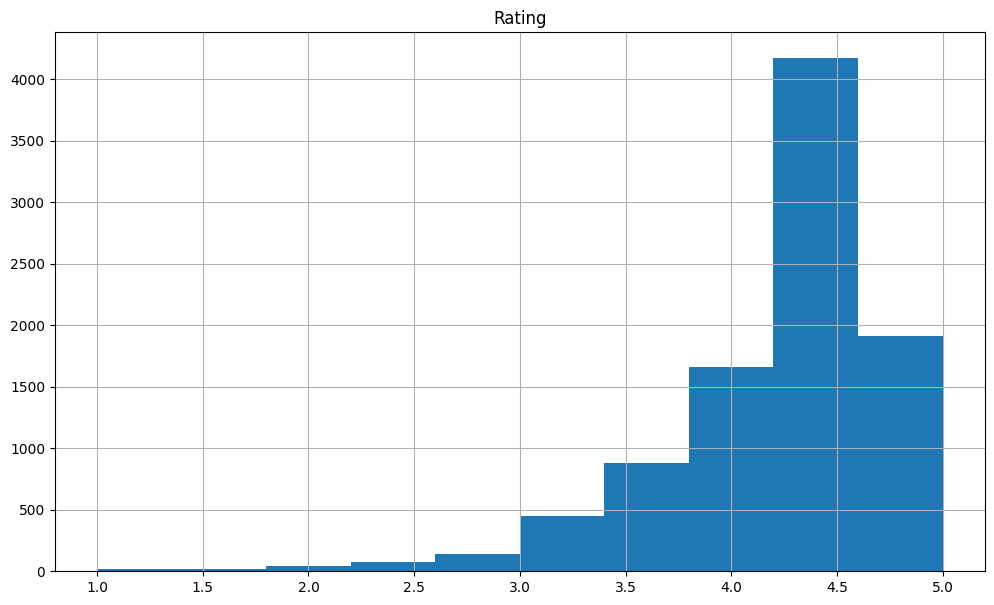

In [182]:
df1.hist()

In [183]:
#  Now we will try to fill out all the null values in the rating by using any mean, median or mode
def imp_median(ser):
    return ser.fillna(ser.median())

In [184]:
df1.Rating = df1["Rating"].transform(imp_median)

In [185]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [186]:
# Categorical data
print(df1["Type"].mode())
print(df1["Current Ver"].mode())
print(df1["Android Ver"].mode())

0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [187]:
# fillin the other missing value with the mode 
df1['Type'].fillna(str(df1["Type"].mode().values[0]),inplace = True)
df1['Current Ver'].fillna(str(df1["Current Ver"].mode().values[0]),inplace = True)
df1['Android Ver'].fillna(str(df1["Android Ver"].mode().values[0]),inplace = True)


In [188]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [189]:
# Changing the data tyep of price,review
df1['Price'] = df1['Price'].apply(lambda x: str(x).replace('$',' ')if '$' in str(x) else str(x))
df1['Price'] = df1['Price'].apply(lambda x: float(x))
df1['Reviews'] = pd.to_numeric(df1['Reviews'])

In [190]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [191]:
df1['Installs'] = df1['Installs'].apply(lambda x :str(x).replace('+','')if '+' in str(x) else str(x))
df1['Installs'] = df1['Installs'].apply(lambda x :str(x).replace(',','')if ',' in str(x) else str(x))
df1['Installs'] = df1['Installs'].apply(lambda x :float(x))

In [192]:
df1.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# Now We will Have some visualisation on this dataset

In [193]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


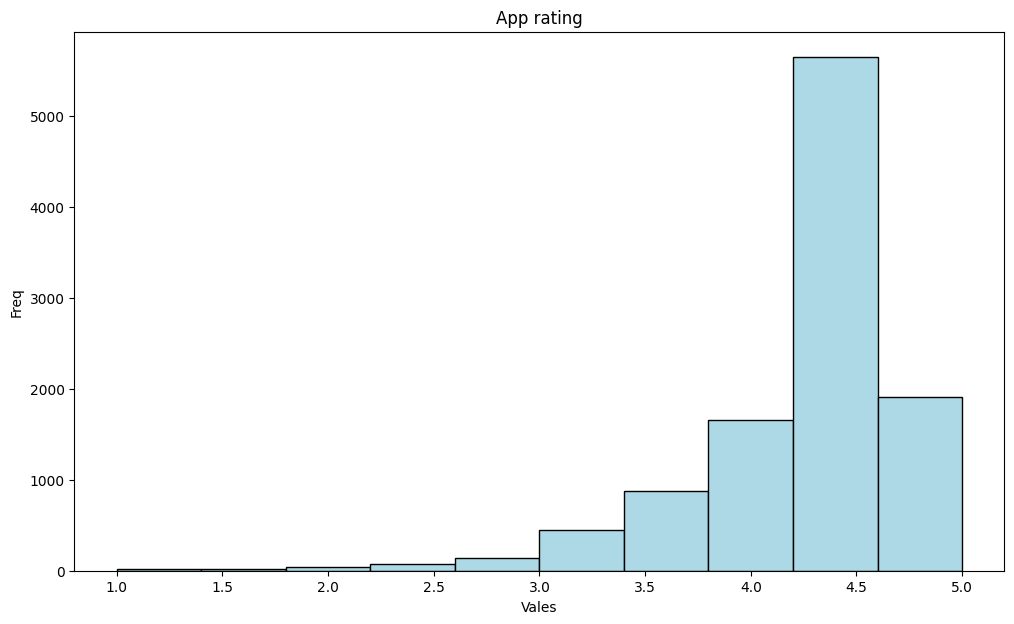

In [208]:
# Distribution of App Ratings using histogram

plt.hist(df1['Rating'], color = 'lightblue', ec='black')
plt.xlabel("Vales")
plt.ylabel("Freq")
plt.title("App rating")
plt.show()


As you can see most of the rating is in the range of 4.2-4.8

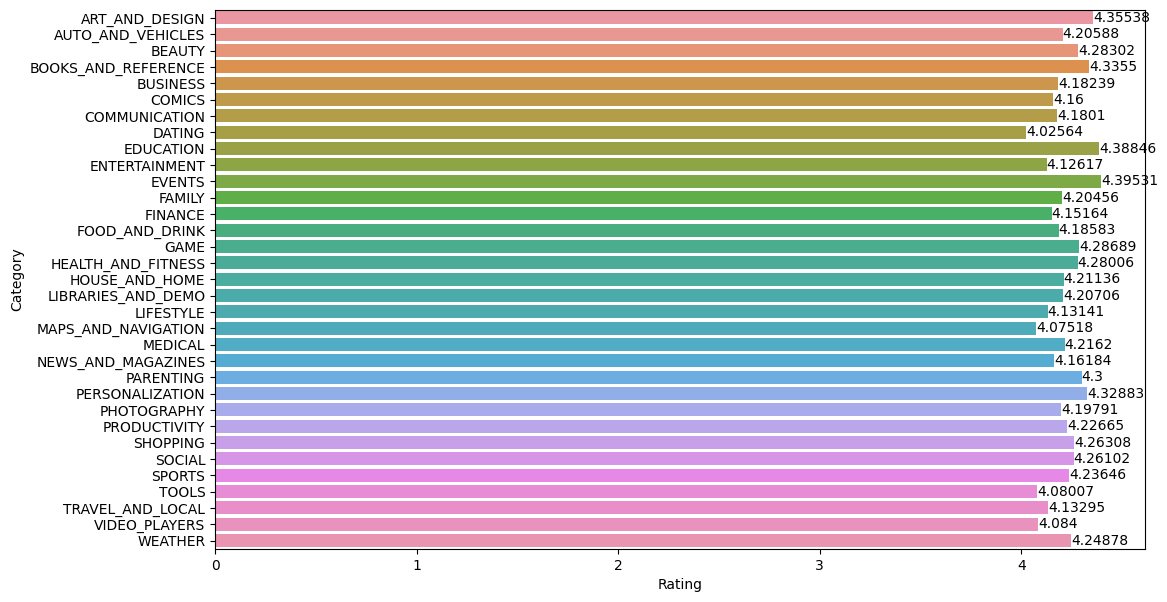

In [195]:
# Average Rating by Category using barplot


df_means = df1.groupby("Category")["Rating"].agg("mean").reset_index()
ax = sns.barplot(x = 'Rating', y= 'Category' , data = df_means)
plt.xlabel("Rating")
plt.ylabel("Category")

for i in ax.containers:
    ax.bar_label(i,)

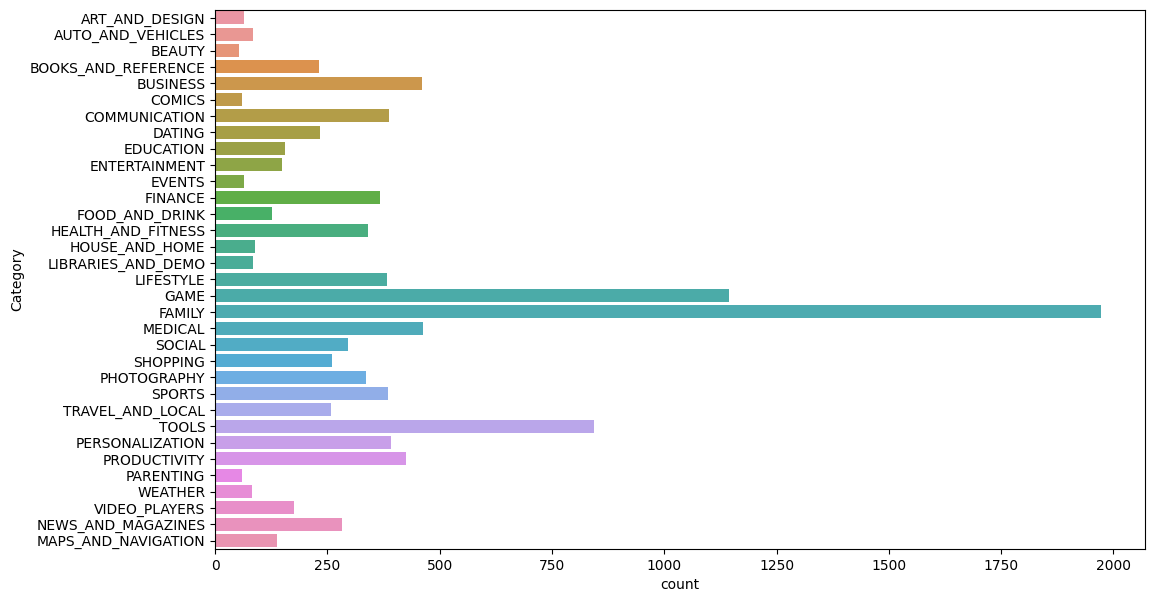

In [196]:
# Number of Apps per Category using countplot

ax = sns.countplot(df1, y='Category')

As we can clearly see that the Family caterogy have the most number of apps

Text(0, 0.5, 'Reviews')

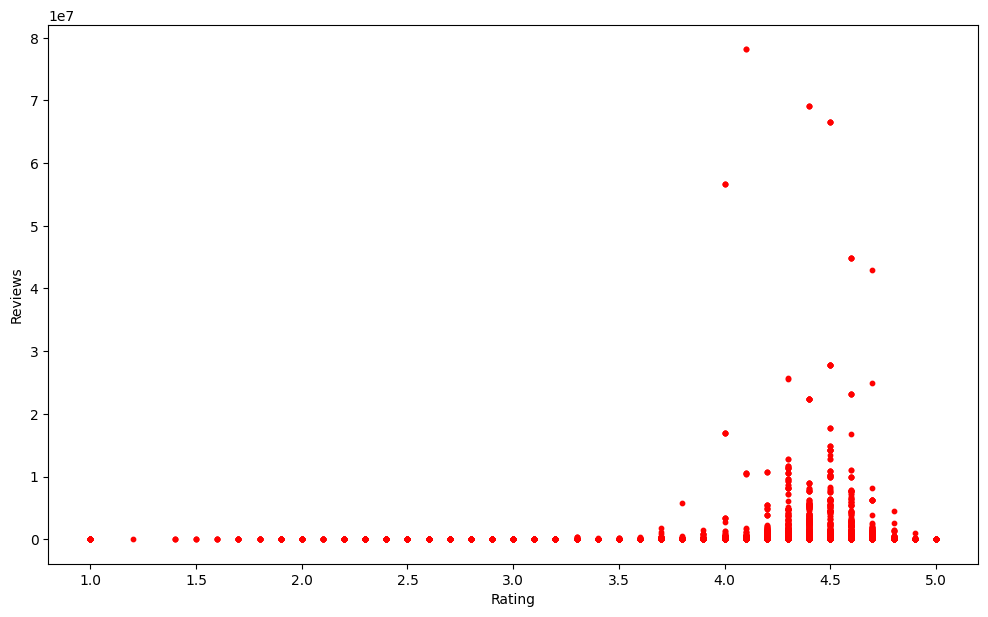

In [197]:
# Correlation between Reviews and Rating

plt.scatter(y = df1.Reviews , x=df1.Rating , c='red',s=10)
plt.xlabel('Rating')
plt.ylabel('Reviews')


It can be seen clearly that higher rating leads to higher chance of having review

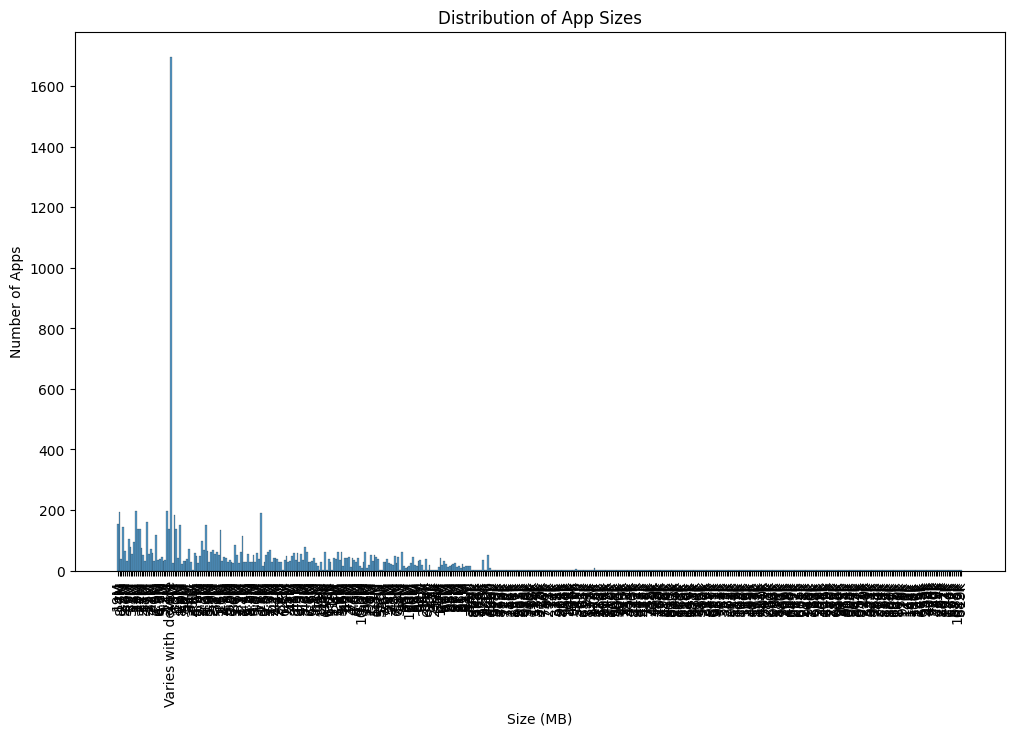

In [198]:
# App Size Distribution Using Histogram

sns.histplot(df1['Size'], bins='auto')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)

plt.show()

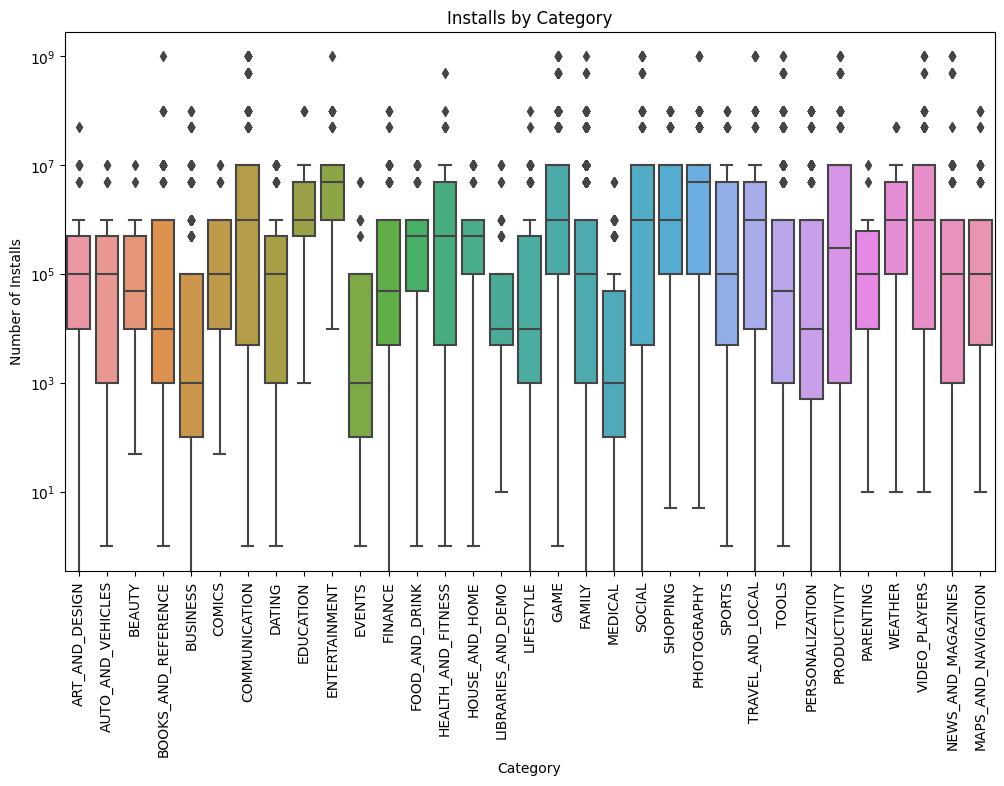

In [199]:
# Installs by Category using box-plot

sns.boxplot(x='Category', y='Installs', data=df1)
plt.title('Installs by Category')
plt.xlabel('Category')
plt.ylabel('Number of Installs')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

With the help of this boxplot we can easily identify the outlier in the each category

Text(0.5, 1.0, 'Content Rating Distribution')

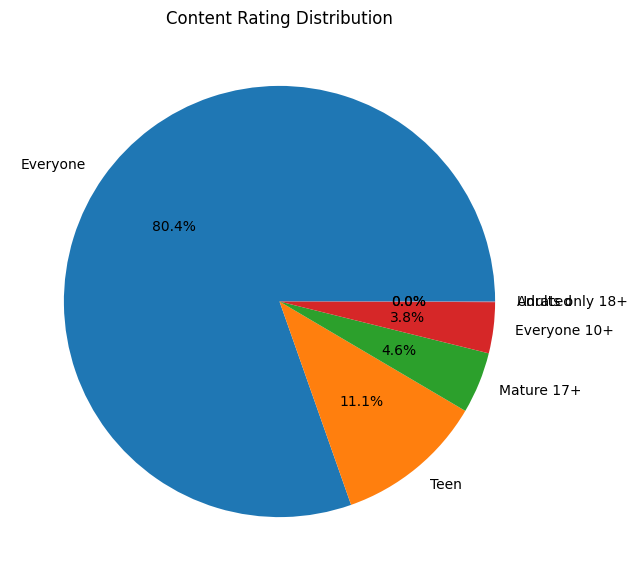

In [200]:
# Content Rating Distribution using piechart

df1['Content Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Content Rating Distribution')


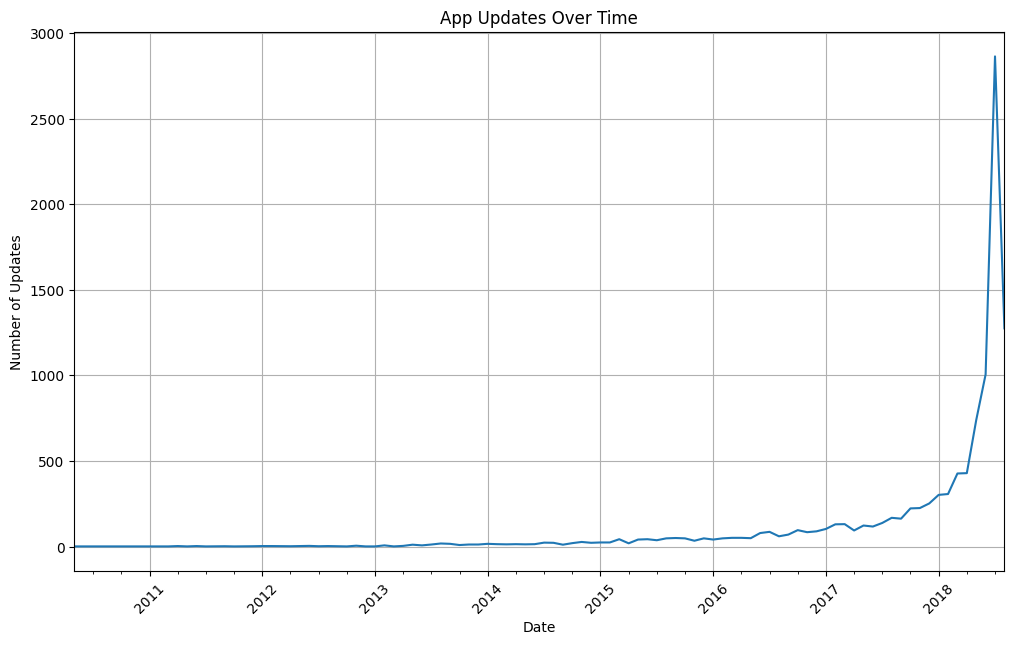

In [203]:
# App Updates Over Time using line chart 


df1['Last Updated'] = pd.to_datetime(df1['Last Updated'])

# Extract year and month from the 'Last Updated' column
df1['YRM'] = df1['Last Updated'].dt.to_period('M')

# Count the number of updates per month
updates_over_time = df1['YRM'].value_counts().sort_index()

# Plot the updates over time
updates_over_time.plot(kind='line')
plt.title('App Updates Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Updates')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

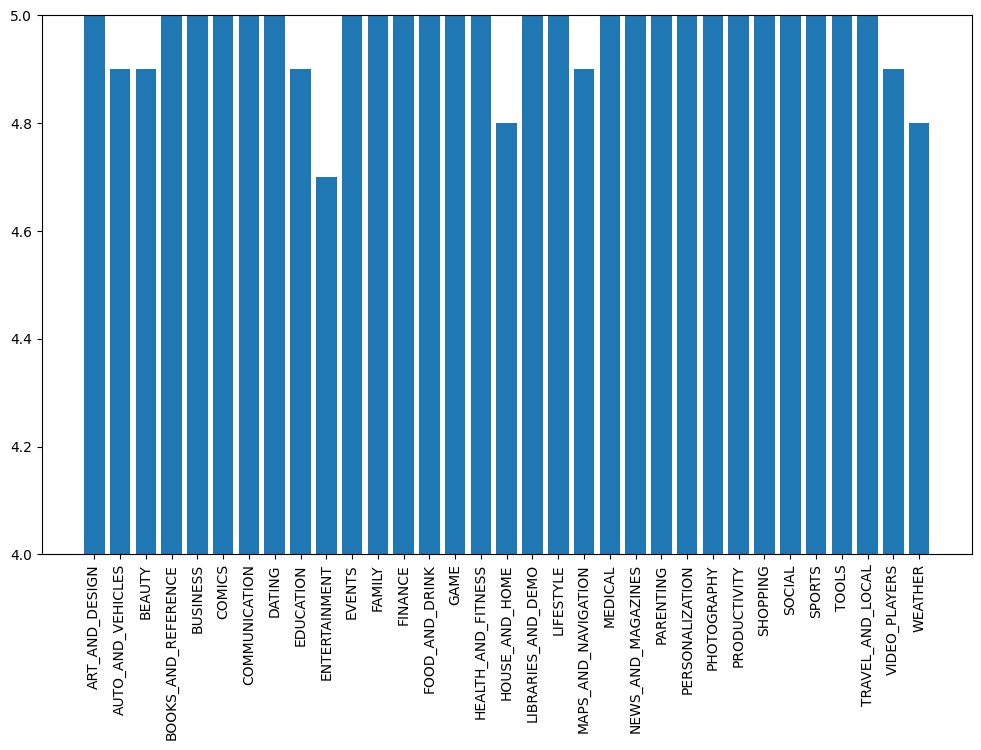

In [204]:
# Top Rated Apps in Each Category

top = df1.loc[df1.groupby('Category')['Rating'].idxmax()]

# Sort the result by Category for better readability

top_app = top.sort_values(by='Category')

ax = plt.bar(top_app['Category'],top_app['Rating'])
plt.xticks(rotation = 90)
plt.ylim(4,5)
plt.show()

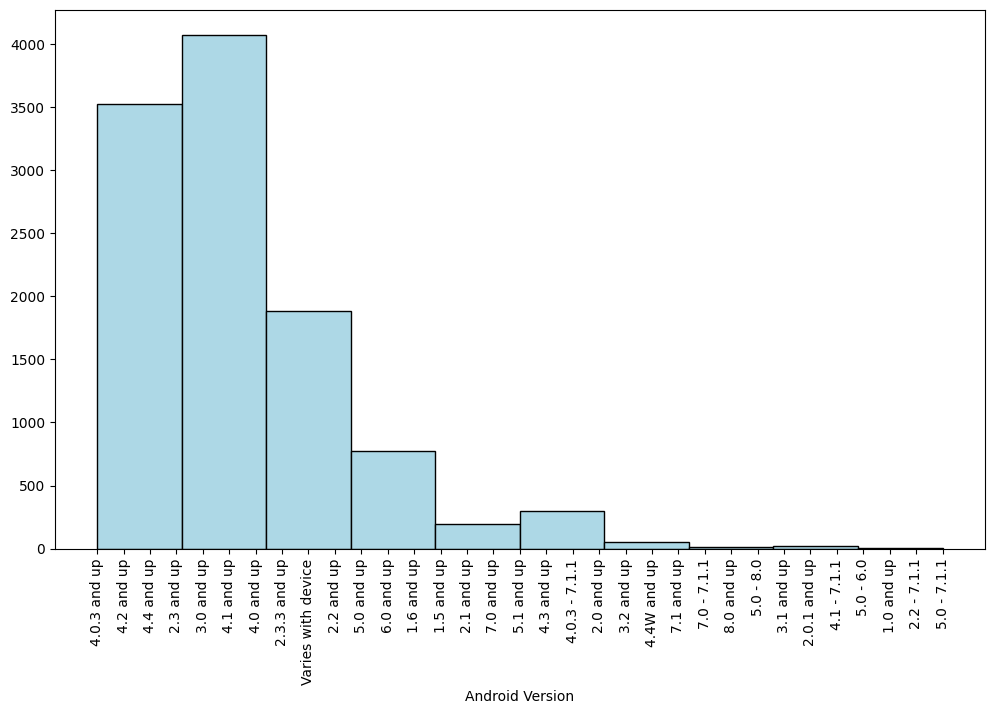

In [205]:
# Distribution of Android Versions Required:

plt.hist(df1['Android Ver'] , color='lightblue', ec='black')
plt.xticks(rotation = 90)
plt.xlabel("Android Version")
plt.show()

Text(0.5, 1.0, 'Free vs Paid')

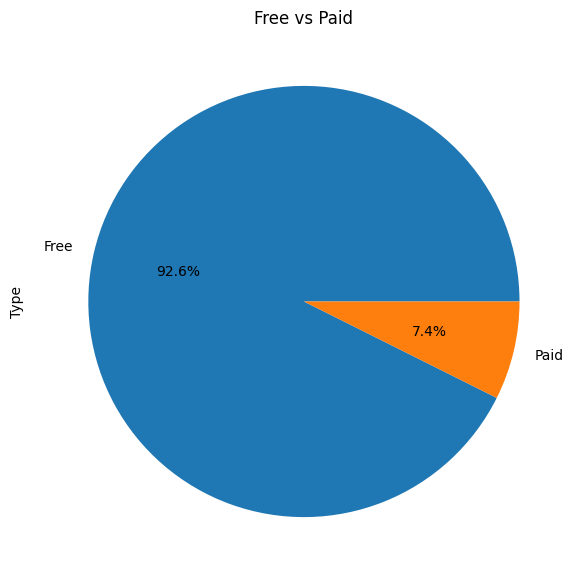

In [219]:
# # Free vs Paid Apps Distribution

df1['Type'].value_counts().plot(kind = 'pie' , autopct='%1.1f%%')
plt.title("Free vs Paid")

# df1['Content Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
